<h1> <center> Linear Regression Model for Predicting House Prices  </h1> <center>
    <h2> Using scikit-learn </h2>
    
Source: [ML Foundationsx, Washington University-Coursera](https://www.coursera.org/learn/ml-foundations/supplement/RP8te/predicting-house-prices-assignment)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

### <center>Load house sales data <center>

In [2]:
houses_df = pd.read_csv('./data/home_data.csv')

In [3]:
houses_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <center> Explore data set <center>

In [4]:
houses_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# describe() does not give any information on the variables of object data type (categorical variables). 
# To get their summary statistics, submit the object data type to the include argument.
# When describing categorical data, we get 
# * the count of non-null occurrences (count), 
# * the number of unique values (unique), 
# * the mode (top),
# * and the number of times the mode was observed (freq).
# Source: https://medium.com/codex/9-efficient-ways-for-describing-and-summarizing-a-pandas-dataframe-316234f46e6

houses_df.describe(include=object)

,date
count,21613
unique,372
top,20140623T000000
freq,142


<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Number of Bedrooms', ylabel='Count'>

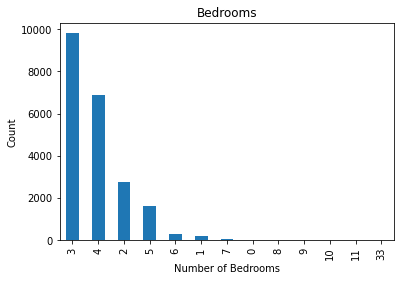

In [6]:
houses_df['bedrooms'].value_counts().plot(kind='bar',
                                          title='Bedrooms',
                                          rot=90,
                                          xlabel='Number of Bedrooms',
                                          ylabel='Count')

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Number of Bathrooms', ylabel='Count'>

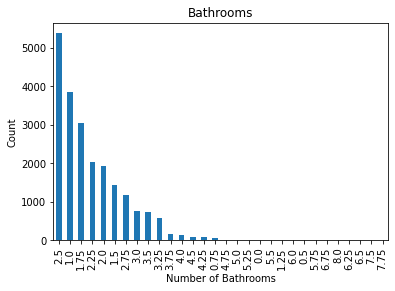

In [7]:
houses_df['bathrooms'].value_counts().plot(kind='bar',
                                          title='Bathrooms',
                                          rot=90,
                                          xlabel='Number of Bathrooms',
                                          ylabel='Count')

<AxesSubplot:title={'center':'Floors'}, xlabel='Number of Floors', ylabel='Count'>

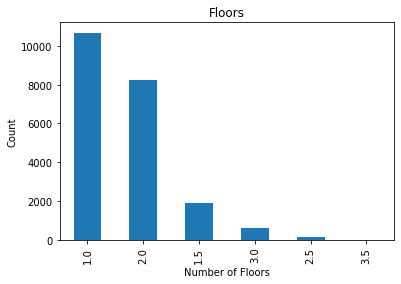

In [8]:
houses_df['floors'].value_counts().plot(kind='bar',
                                          title='Floors',
                                          rot=90,
                                          xlabel='Number of Floors',
                                          ylabel='Count')

<AxesSubplot:title={'center':'Grade'}, ylabel='grade'>

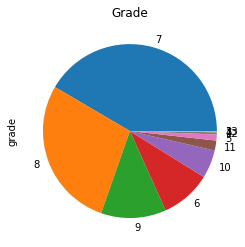

In [9]:
houses_df['grade'].value_counts().plot(kind='pie',
                                          title='Grade')

<AxesSubplot:title={'center':'Zip Codes'}, ylabel='Zip Code'>

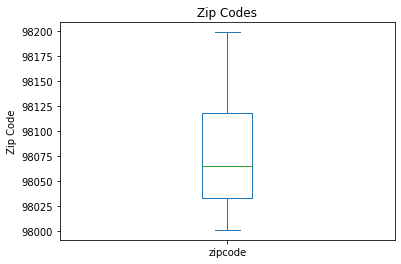

In [10]:
houses_df.plot(kind='box',
               y='zipcode',
               title='Zip Codes',
               rot=0,
               ylabel='Zip Code')

<AxesSubplot:title={'center':'Price'}, ylabel='Density'>

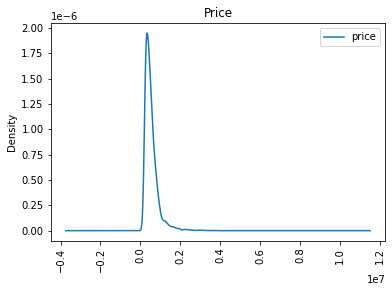

In [11]:
houses_df.plot(kind='density',
               y='price',
               title='Price',
               rot=90,
               xlabel='Price',
               ylabel='Density')

Text(0.5, 0, 'Price in millions')

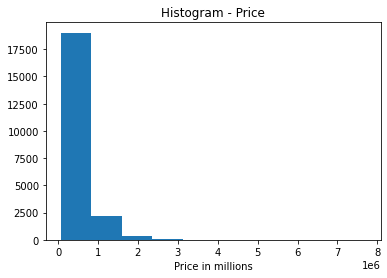

In [12]:
houses_df.hist(column='price',
               grid=False
               #, bins=10
               )
plt.title("Histogram - Price")
plt.xlabel("Price in millions")

<AxesSubplot:>

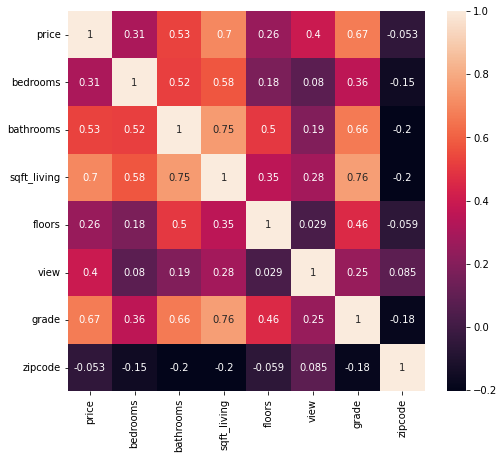

In [13]:
# Pairwise correlations between the variables can be calculated using the Pandas DataFrame corr() method. 
# the Seaborn heatmap() function is used to create the heatmap.
cols_subset = ['price','bedrooms','bathrooms','sqft_living','floors','view','grade','zipcode']
fig = plt.figure(figsize=(8,7))
sns.heatmap(houses_df[cols_subset].corr(), annot=True)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='zipcode', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='floors', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='grade', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='zipcode', ylabel='bedrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:x

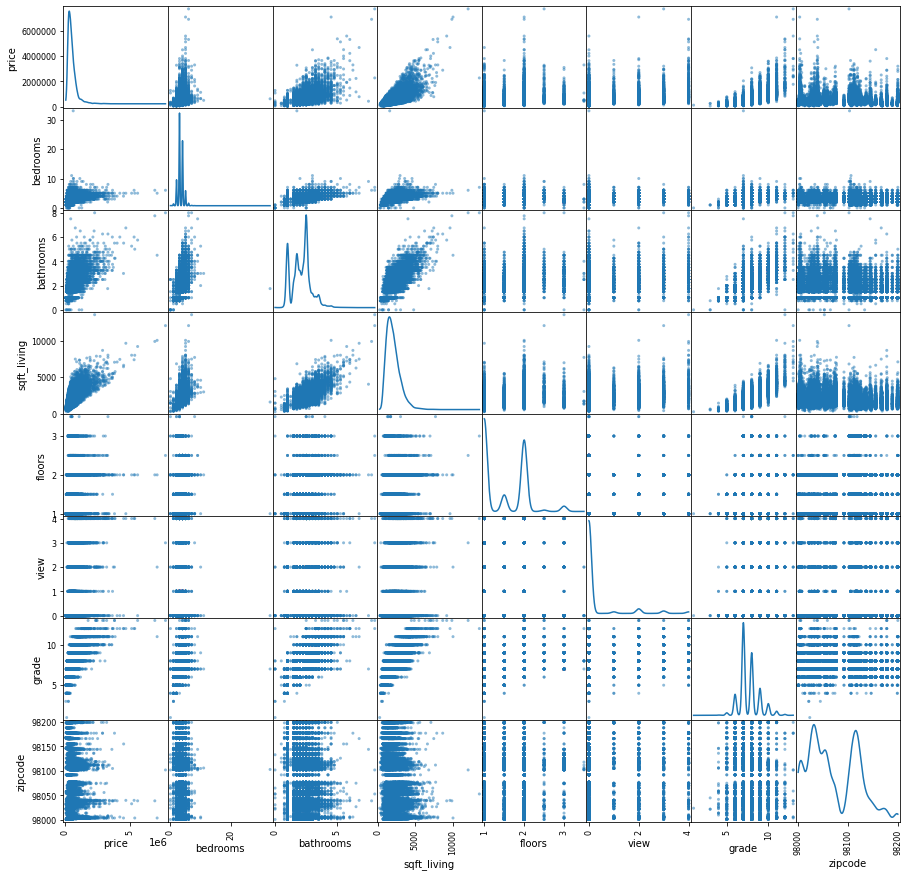

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(houses_df[cols_subset], figsize=(15,15), diagonal='kde')

<AxesSubplot:title={'center':'price'}, xlabel='zipcode'>

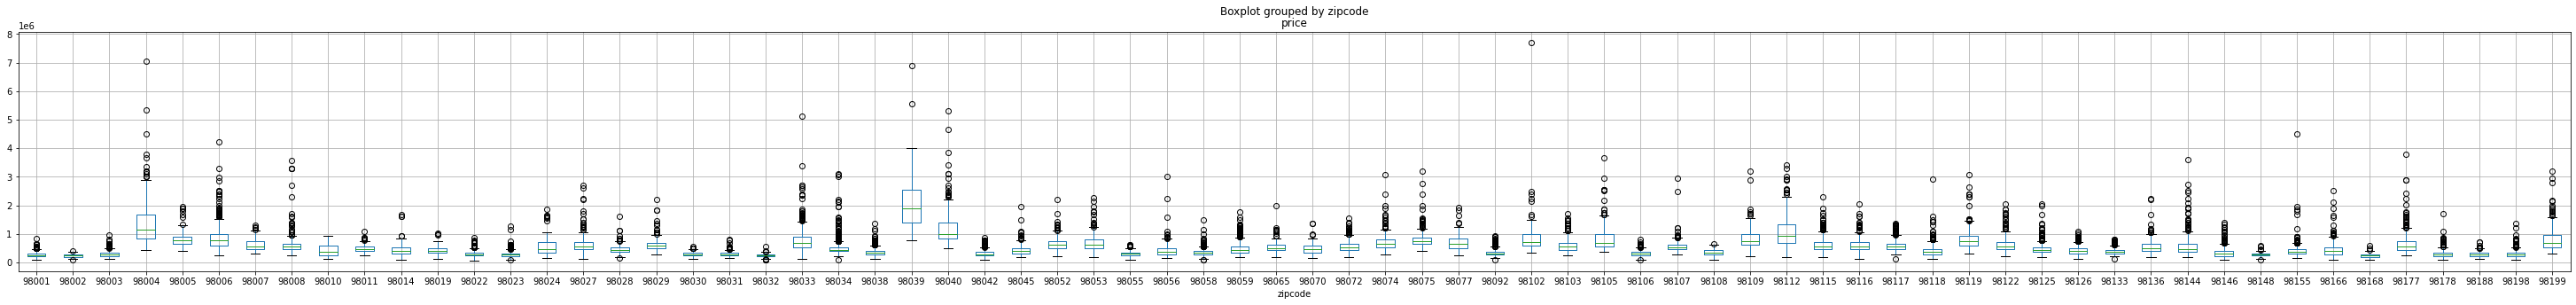

In [15]:
houses_df.boxplot(column=['price'],
                  by='zipcode',
                 figsize=(50,5))

__Zip code with the largest average price__

In [16]:
houses_df.groupby('zipcode',as_index=False).mean()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,0.000000,0.102210,3.337017,7.295580,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,6.693467,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,7.542857,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,8.488095,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98177,3.934998e+09,6.761854e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,0.003922,0.815686,3.494118,7.976471,1836.713725,486.619608,1960.843137,172.145098,47.742381,-122.369282,2186.196078,11690.239216
66,98178,4.291467e+09,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,0.034351,0.534351,3.320611,6.816794,1325.992366,403.358779,1955.232824,84.057252,47.499118,-122.246969,1648.816794,8149.641221
67,98188,4.481851e+09,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,0.147059,3.330882,7.036765,1492.154412,310.617647,1965.507353,43.794118,47.447310,-122.280993,1636.279412,9752.801471
68,98198,5.152291e+09,3.028789e+05,3.182143,1.788393,1745.360714,10525.978571,1.225000,0.035714,0.592857,3.442857,7.103571,1476.253571,269.107143,1966.735714,85.492857,47.390788,-122.315743,1711.571429,9478.596429


In [17]:
houses_df.groupby('zipcode',as_index=False).mean().sort_values(['price'],ascending=False).head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
24,98039,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,510.000000,1972.520000,398.600000,47.625840,-122.233540,3132.200000,17291.100000
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
25,98040,4.199323e+09,1.194230e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.042553,0.783688,3.787234,8.960993,2474.329787,632.503546,1971.471631,233.574468,47.559846,-122.225592,2898.744681,12801.283688
48,98112,4.826282e+09,1.095499e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.148699,3.516729,8.442379,2005.695167,493.048327,1944.449814,223.144981,47.629619,-122.297866,2280.078067,4898.159851
41,98102,4.123034e+09,9.012582e+05,3.219048,2.261905,2159.742857,3616.190476,2.004762,0.000000,0.171429,3.371429,8.285714,1764.933333,394.809524,1952.523810,113.923810,47.634607,-122.322248,1958.333333,3310.133333


In [18]:
houses_df[houses_df['zipcode']==98039]['price'].mean()

2160606.6

__Total number of data points__

In [19]:
houses_df.shape

(21613, 21)

__Ratio of houses with area between 2000 and 4000 square feet__

In [20]:
houses_df[(houses_df['sqft_living']>2000) & (houses_df['sqft_living']<4000) ].shape

(9111, 21)

In [21]:
houses_df[(houses_df['sqft_living']>2000) & (houses_df['sqft_living']<4000) ].shape[0]/houses_df.shape[0]

0.4215518437977143


# 
## <center> Simple regression model that predicts price from 1 feature <center>

### <center> Option 1: manually splitting into train and test sets <center>

get train and test sets

In [22]:
training_set = houses_df.sample(frac=0.8,random_state=42)
test_set = houses_df.drop(training_set.index)

In [23]:
# reshape for the regressor to work
x_train_1 = training_set.loc[:,'sqft_living'].values.reshape(len(training_set),1)
y_train_1 = training_set.loc[:,'price'].values.reshape(len(training_set),1)
x_test_1 = test_set.loc[:,'sqft_living'].values.reshape(len(test_set),1)
y_test_1 = test_set.loc[:,'price'].values.reshape(len(test_set),1)

train simple regression model

In [24]:
regressor1 = LinearRegression()
regressor1.fit(x_train_1, y_train_1)
regressor1.coef_

array([[285.47788411]])

### <center> Option 2: use sklearn to split into train and test sets<center>

In [25]:
from sklearn.model_selection import train_test_split

# X.shape should be (N, M) where M >= 1
x = houses_df[['sqft_living']]  
# y.shape should be (N, 1)
y = houses_df['price'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
y_train.shape

(17290,)

In [27]:
sqft_model = LinearRegression()
sqft_model.fit(x_train,y_train)
sqft_model.coef_

array([279.55477851])

### <center> Evaluate the quality of the model <center>

In [28]:
print (x_test_1.mean())
print (x_test.values.mean())

2073.640990053204
2103.916261855193


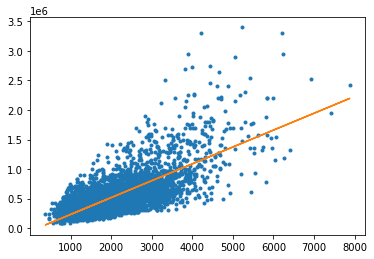

In [29]:
plt.plot(x_test_1,y_test_1,'.',
         x_test_1,regressor1.predict(x_test_1),'-')

/home/potalvar/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


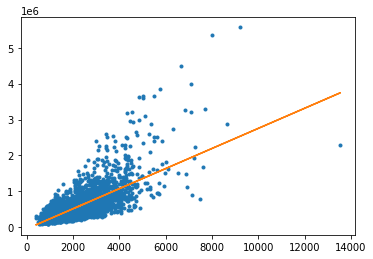

In [30]:
plt.plot(x_test.values,y_test.values,'.',
         x_test.values,sqft_model.predict(x_test.values),'-')

# 
<h2> <center> Regression Model that predicts price from 6 features </h2> <center>

In [31]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
#sales[my_features].show()

In [32]:
# split
x2 = houses_df[my_features]  
y2 = houses_df['price'] 
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# train
my_features_model = LinearRegression()
my_features_model.fit(x_train2,y_train2)
my_features_model.coef_

array([-5.66723924e+04,  1.65476422e+04,  3.13063049e+02, -3.20232174e-01,
       -5.76662072e+03,  5.81860332e+02])

# 
<h2> <center> Regression Model that predicts price from 18 features </h2> <center>

In [33]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]


In [34]:
# split
x3 = houses_df[advanced_features]  
y3 = houses_df['price'] 
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

# train
advanced_features_model = LinearRegression()
advanced_features_model.fit(x_train3,y_train3)
advanced_features_model.coef_

array([-3.43354189e+04,  4.45645358e+04,  1.09015816e+02,  8.88473505e-02,
        7.00312462e+03, -5.52253009e+02,  2.45267105e+04,  9.45678906e+04,
        5.62413071e+05,  5.36411067e+04,  7.00227414e+01,  3.89930750e+01,
       -2.68076897e+03,  2.04156320e+01,  5.95968123e+05, -1.94585720e+05,
        2.12143281e+01, -3.25831855e-01])

# 
<h2> <center>Compare simple model with more complex ones </h2> <center>

In [35]:
from sklearn.metrics import mean_squared_error

print ('rmse',mean_squared_error(y_test,sqft_model.predict(x_test))**0.5)
print ('rmse',mean_squared_error(y_test2,my_features_model.predict(x_test2))**0.5)
print ('rmse',mean_squared_error(y_test3,advanced_features_model.predict(x_test3))**0.5)

rmse 276559.17557510565
rmse 270717.1889994409
rmse 212539.51673446654


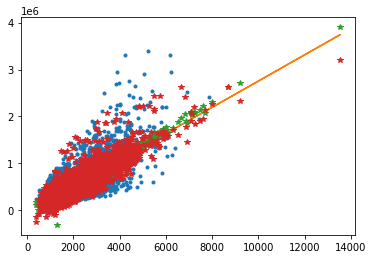

In [36]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        x_test['sqft_living'],sqft_model.predict(x_test),'-',
        x_test2['sqft_living'],my_features_model.predict(x_test2),'*',
        x_test3['sqft_living'],advanced_features_model.predict(x_test3),'*')

# Apply learned models to make predictions

In [37]:
house1 = houses_df[houses_df['id']==5309101200]

In [38]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [39]:
print (house1['price'])

1054    620000
Name: price, dtype: int64


In [40]:
house1_1col = pd.DataFrame(house1['sqft_living'].values.reshape(-1,1), columns=['sqft_living'])
print (sqft_model.predict(house1_1col))

[628932.28388041]


In [41]:
print (my_features_model.predict(house1[my_features]))

[632032.39138526]


In [42]:
print(advanced_features_model.predict(house1[advanced_features]))

[671712.21577704]


## Prediction for a second house, a fancier one

In [43]:
house2 = houses_df[houses_df['id']==1925069082]

In [44]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [45]:
house2_1col = pd.DataFrame(house2['sqft_living'].values.reshape(-1,1), columns=['sqft_living'])
print (sqft_model.predict(house2_1col))

[1255134.98774159]


In [46]:
print (my_features_model.predict(house2[my_features]))

[1263455.29309881]


In [47]:
print(advanced_features_model.predict(house2[advanced_features]))

[1938727.11037735]


## Prediction for a super fancy home

In [48]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [49]:
print (my_features_model.predict(pd.DataFrame(bill_gates)[my_features]))

[15553462.175942]


In [50]:
print (advanced_features_model.predict(pd.DataFrame(bill_gates)[advanced_features]))

[10880665.82988396]
